[View in Colaboratory](https://colab.research.google.com/github/k-chiou/InsultDetector/blob/master/Insult_Detector.ipynb)

# Insult Detecter

https://www.kaggle.com/c/detecting-insults-in-social-commentary

## ⓪学習Data取得

### By Google Drive

In [0]:
# Google Driveと連携
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
!ls /content/drive/'My Drive'

### By Downloading
Kaggelからダウンロードするため、ログイン（Cookie?）要りそう

In [0]:
#!wget https://www.kaggle.com/c/detecting-insults-in-social-commentary/download/train.csv
#!wget https://www.kaggle.com/c/detecting-insults-in-social-commentary/download/test_with_solutions.csv
#!ls

In [2]:
!wget https://github.com/k-chiou/InsultDetector/blob/master/test_with_solutions.csv
!wget https://github.com/k-chiou/InsultDetector/blob/master/train.csv
!ls

--2018-10-26 01:34:50--  https://github.com/k-chiou/InsultDetector/blob/master/test_with_solutions.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test_with_solutions.csv.1’

test_with_solutions     [  <=>               ]   1.19M  3.88MB/s    in 0.3s    

2018-10-26 01:34:51 (3.88 MB/s) - ‘test_with_solutions.csv.1’ saved [1243189]



## ①Data処理

In [0]:
import pandas as pd
import os
#path = "/content/drive/My Drive/Colab Notebooks/insult" # Google Driveと連携する場合
path = "." # wgetの場合
data = pd.read_csv(os.path.join(path, 'train.csv')) # os.path.join = path + "/" + filename

In [0]:
data.head(5) # 先頭n行のデータを表示。nは省略可（デフォルト:n=5）。

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [0]:
data.drop('Date', axis=1, inplace=True) # axis = 0: 行/　axis = 1: 列。 inplace: 対象をそのまま取り替えるか
#data = data.drop('Date', axis=1, inplace=False)

In [0]:
data.head(5)

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [0]:
# Check the equalization of shapes of input(X) and output(Y) data 
print("Shape of Comment: {}".format(data['Comment'].shape))
print("Shape of Insult: {}".format(data.Insult.shape))

In [0]:
# Check if there is any null in data
print("Shape of Comment with null: {}".format(data.Comment[data.Comment.isnull()].shape))
print("Shape of Insult with null: {}".format(data.Insult[data.Insult.isnull()].shape))
# もしあれば、便宜上、削除する/（数値の場合）全データの平均値に取り替える

In [0]:
data.info()

In [0]:
import re
regex = re.compile('[^a-zA-Z]')

words_dict = []
for string in data['Comment']:
    words_dict = words_dict + string.split()
    
for i, word in enumerate(words_dict):
    words_dict[i] = regex.sub('', word)
    words_dict[i] = words_dict[i].lower()
    
words_dict = [words for words in words_dict if (words != "" and len(words) <= 15)]
        
words_dict = list(set(words_dict))
print(len(words_dict))
print(words_dict)

17829
['jesus', 'applies', 'organics', 'nnyouve', 'layton', 'wop', 'tboned', 'biblical', 'unreelectable', 'chargesxcxa', 'broken', 'copt', 'token', 'hahahahaa', 'file', 'tuesdaynnone', 'somethingna', 'status', 'jai', 'putin', 'xanxani', 'aheadnnq', 'bark', 'regress', 'analogy', 'commentators', 'chestxa', 'surf', 'knownnbesides', 'round', 'charecter', 'fools', 'senador', 'californian', 'donit', 'visible', 'mronnproof', 'libel', 'authorities', 'thexannuananana', 'zemun', 'topic', 'membershipnnthe', 'nlong', 'borrowed', 'beginsxcxa', 'plans', 'pear', 'striaght', 'fouled', 'corrupt', 'diction', 'details', 'kinect', 'uhif', 'xcxabut', 'slavexa', 'gloyte', 'shitnmust', 'topharry', 'yankeeclipper', 'solely', 'bat', 'nice', 'guards', 'vest', 'lib', 'appoints', 'minimally', 'faster', 'dayloser', 'exam', 'apparent', 'xatoo', 'greedcommon', 'mohr', 'trolling', 'stem', 'themselves', 'days', 'bred', 'outsized', 'ricky', 'conceding', 'foolxa', 'countless', 'condom', 'diseased', 'denies', 'sexualityx

In [0]:
def wordArray(string, dic):
    words = string.split()
    for i, word in enumerate(words):
        words[i] = regex.sub('', word)
        words[i] = words[i].lower()
    words = [word for word in words if (word != "" and len(word) <= 15)]
    array = [0] * len(dic)
    for word in words:
        for i, w in enumerate(dic):
            if word == w:
                array[i] = 1
                break
    return array

In [0]:
print(wordArray(data['Comment'][0], words_dict))

In [0]:
import numpy as np
print(np.zeros((2,3)))

[[0. 0. 0.]
 [0. 0. 0.]]


In [0]:
import sys, time
start_time = time.time()
m = np.zeros((data['Comment'].count(), len(words_dict))) # matrixのフレームを作り、0を初期値として入れておく
for i, s in enumerate(data['Comment']): # wordArrayを作り、matrixの要素を入れ替える
    m[i,:] = np.array(wordArray(s, words_dict))
print("Cost Time: {}s".format(time.time() - start_time))
print("Cost Ram: {}GB".format(sys.getsizeof(m)/(1024**3)))

Cost Time: 132.32329440116882s
Cost Ram: 0.5243053808808327GB


In [0]:
X = pd.DataFrame(m)
Y = data['Insult']
print(m.shape)
print(X.shape)
print(Y.shape)

(3947, 17829)
(3947, 17829)
(3947,)


In [0]:
# 疎行列(Sparse Matrix)化
from scipy import sparse
sm = sparse.csr_matrix(m)
print(sm.shape)
print("Cost Ram: {}B".format(sys.getsizeof(sm)))
# Fitの速度も早くなる！

(3947, 17829)
Cost Ram: 56B


In [0]:
# Sparse Matrixの仕組み
print(sm[0])

  (0, 580)	1.0
  (0, 10103)	1.0
  (0, 10198)	1.0
  (0, 13739)	1.0


In [0]:
print("  580: {}\n10103: {}\n10198: {}\n13739: {}".format(words_dict[580], words_dict[10103], words_dict[10198], words_dict[13739]))

  580: you
10103: dad
10198: your
13739: fuck


## ②トレーニングと評価

### 決定木 (Decision Tree)

![Decision Tree](https://cdn-images-1.medium.com/max/1200/0*Yclq0kqMAwCQcIV_.jpg)

### Random Forest

団結力最高！！

![Random Forest](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345)

### XGBoost

Gradient BoostingとRandom Forestsを組み合わせたアンサンブル学習である
[from Qitta](https://qiita.com/yh0sh/items/1df89b12a8dcd15bd5aa)

In [0]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import time

start_time = time.time()
XGB = xgb.XGBClassifier() # n_estimators=500, learning_rate=0.1, max_depth=2
X_train, X_test, y_train, y_test = train_test_split(sm, Y,test_size = 1/6, random_state=42)
XGB.fit(X_train,y_train)
print("Cost Time: {}s".format(time.time() - start_time))

# Without Sparse Matrix: 625.0822050571442s
# With Sparse Matrix:    5.461507081985474s

Cost Time: 1.3328125476837158s


In [0]:
y_pred = XGB.predict_proba(X_test)
print(y_pred)
print(y_pred.shape)
print(X_test.shape)
# probility(insult == 0)/ probility(insult == 1)

[[0.29377627 0.7062237 ]
 [0.67608356 0.32391647]
 [0.67608356 0.32391647]
 ...
 [0.67608356 0.32391647]
 [0.6195689  0.38043112]
 [0.22055    0.77945   ]]
(658, 2)
(658, 17829)


In [0]:
y_pred = XGB.predict_proba(X_test)[:,1]
#y_pred = XGB.predict(X_test)

True Positive(TP)： 正解データ正であるものを、正しく正と予測できた数

False Positive(FP)：正解データ負であるものを、間違って正と予測した数

True Positive Rate  (真陽性率）： TP/(TP+FN)

False Positive Rate(偽陽性率）： FP/(FP+TN)

![AUC](https://cdn-ak.f.st-hatena.com/images/fotolife/N/Np-Ur/20171121/20171121235406.png)

(横軸：偽陽性率、縦軸：真陽性率）

AUC(Area under an ROC curve)

ref: https://takuti.me/note/auc/

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
print(AUC)

0.8404284790839412


### DeepLearning

Step 1:  Hidden Layerの層数とニューロン数を決める

![Neural Network](http://blog.christianperone.com/wp-content/uploads/2015/08/neural_net2.jpeg)

---



Step 2:  Activation Functionを決める

　[Activation Fuction](http://www.bdpt.net/cn/others/activation_functions_d3.html)
 
　![Relu/Sigmoid](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)
 
　①Relu
*   Hidden Layerによく使われる
*   R'(z) for z>0 = 1 収束早い

　②Sigmoid
*   出力Layerによく使われる
*   Binary問題

　![Softmax](https://i.stack.imgur.com/0rewJ.png)

　③Softmax
*   出力Layerによく使われる
*   Binary問題


---



Step 3:  Loss Functionを決める

　For Regression(回帰) Case: 
 
　　①Mean Squared Error
  
　　![MSE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_001.png)
          
　　②Mean Absolute Error
          
　　![MAE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_002.png)
          
　　③Mean Absolute Percentage error
  
　　![MAPE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_003.png)
          
　　④Mean Squared Logarithmic Error
  
　　![MSLE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_004.png)
  
　For Classification(分類) Case:
 
　　①Binary Crossentropy (出力Yは0/1というBinary問題の場合)
  
　　![BC](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_011.png)
  
　　②Categorical Crossentropy (答えは一つしかない場合)
  
　　![CC](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_012.png)
  
  

---



Step 4:  Optimizerを決める

　Parameters: ①Learning Rate、②Momentum、③Decay
 
 

---


 
Step 5:  Compile Model



---



Step 6:  Fit Model

In [0]:
import tensorflow as tf
from keras.models import  Model
from keras.layers import Dense, Activation, Input

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Create model with API mode

input = Input(shape=(sm.shape[1],), sparse=True)
x = Dense(128, activation='sigmoid')(input)
x = Dense(256, activation='sigmoid')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input], outputs=[output])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 17829)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               2282240   
_________________________________________________________________
dense_44 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 257       
Total params: 2,315,521
Trainable params: 2,315,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sm, Y,test_size = 1/6, random_state=42)
history = model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=10, shuffle=True)

Epoch 1/10
3289/3289 [==============================] - 4s 1ms/step - loss: 0.5916 - acc: 0.7145
Epoch 2/10
3289/3289 [==============================] - 3s 904us/step - loss: 0.5278 - acc: 0.7370
Epoch 3/10
3289/3289 [==============================] - 3s 907us/step - loss: 0.4059 - acc: 0.8036
Epoch 4/10
3289/3289 [==============================] - 3s 872us/step - loss: 0.2789 - acc: 0.8927
Epoch 5/10
3289/3289 [==============================] - 3s 887us/step - loss: 0.1963 - acc: 0.9322
Epoch 6/10
3289/3289 [==============================] - 3s 893us/step - loss: 0.1402 - acc: 0.9590
Epoch 7/10
3289/3289 [==============================] - 3s 900us/step - loss: 0.1040 - acc: 0.9711
Epoch 8/10
3289/3289 [==============================] - 3s 901us/step - loss: 0.0772 - acc: 0.9811
Epoch 9/10
3289/3289 [==============================] - 3s 879us/step - loss: 0.0596 - acc: 0.9872
Epoch 10/10
3289/3289 [==============================] - 3s 902us/step - loss: 0.0467 - acc: 0.9903


In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
print(AUC)

0.8526987718164188


In [0]:
score = model.evaluate(X_test, y_test, batch_size=64)
print(score[1]) # not AUC?

658/658 [==============================] - 0s 583us/step
0.8297872342237224


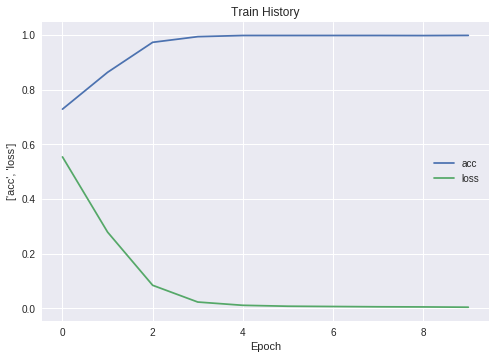

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Train History')
plt.ylabel(['acc', 'loss'])
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='right')
plt.show()

# Appendix：Data処理方法（Feature Engineering）

## 定量化（Quantify）：文字→数値

In [0]:
lyrics = ["P-P-A-P", "I have a pen, I have a apple", "Uh! Apple Pen!", "I have a pen, I have pineapple", "Uh! Pineapple Pen!", "Apple Pen, Pineapple Pen", "Uh! Pen Pineapple Apple Pen", "Pen Pineapple Apple Pen"]
print("{}\n".format(lyrics))
for i, lyric in enumerate(lyrics):
  print("{}  {}".format(i, lyric))

['P-P-A-P', 'I have a pen, I have a apple', 'Uh! Apple Pen!', 'I have a pen, I have pineapple', 'Uh! Pineapple Pen!', 'Apple Pen, Pineapple Pen', 'Uh! Pen Pineapple Apple Pen', 'Pen Pineapple Apple Pen']

0  P-P-A-P
1  I have a pen, I have a apple
2  Uh! Apple Pen!
3  I have a pen, I have pineapple
4  Uh! Pineapple Pen!
5  Apple Pen, Pineapple Pen
6  Uh! Pen Pineapple Apple Pen
7  Pen Pineapple Apple Pen


In [0]:
# 単語単位で分ける
lyric_words = lyrics[1].split()
print("{}\n".format(lyric_words))
for i, word in enumerate(lyric_words):
  print("{}  {}".format(i, word))

['I', 'have', 'a', 'pen,', 'I', 'have', 'a', 'apple']

0  I
1  have
2  a
3  pen,
4  I
5  have
6  a
7  apple


In [0]:
# 正規化(Normalization)
# a~z & A~Z以外のcharをemptyに取り替える（けずる）
import re
regex = re.compile('[^a-zA-Z]')
regex.sub('', lyric_words[3])

'pen'

In [0]:
# 全ての単語が含まれる語彙集(Dictionary)作成
lyric_dict = []
for lyric in lyrics:
    lyric_dict = lyric_dict + lyric.split()
for i, word in enumerate(lyric_dict):
  lyric_dict[i] = regex.sub('', word)
  lyric_dict[i] = lyric_dict[i].lower()
print(lyric_dict)

['ppap', 'i', 'have', 'a', 'pen', 'i', 'have', 'a', 'apple', 'uh', 'apple', 'pen', 'i', 'have', 'a', 'pen', 'i', 'have', 'pineapple', 'uh', 'pineapple', 'pen', 'apple', 'pen', 'pineapple', 'pen', 'uh', 'pen', 'pineapple', 'apple', 'pen', 'pen', 'pineapple', 'apple', 'pen']


In [0]:
# 重複単語を削除
lyric_dict = list(set(lyric_dict))
print(lyric_dict)

['i', 'have', 'apple', 'uh', 'a', 'pen', 'ppap', 'pineapple']


In [0]:
def wordArray(string, dic):
    words = string.split()
    for i, word in enumerate(words):
        words[i] = regex.sub('', word)
        words[i] = words[i].lower()
    array = [0] * len(dic)
    for word in words:
        for i, w in enumerate(dic):
            if word == w:
                array[i] = 1
                break
    return array

In [0]:
import pandas as pd

lyric_list = []
lyric_array_list = []
for lyric in lyrics:
  lyric_list.append(lyric)
  lyric_array_list.append(wordArray(lyric, lyric_dict))
lyric_dataframe = pd.DataFrame()
lyric_dataframe['lyric'] = lyric_list
lyric_dataframe['array'] = lyric_array_list
print(lyric_dict)
lyric_dataframe

['i', 'have', 'apple', 'uh', 'a', 'pen', 'ppap', 'pineapple']


,lyric,array
0,P-P-A-P,"[0, 0, 0, 0, 0, 0, 1, 0]"
1,"I have a pen, I have a apple","[1, 1, 1, 0, 1, 1, 0, 0]"
2,Uh! Apple Pen!,"[0, 0, 1, 1, 0, 1, 0, 0]"
3,"I have a pen, I have pineapple","[1, 1, 0, 0, 1, 1, 0, 1]"
4,Uh! Pineapple Pen!,"[0, 0, 0, 1, 0, 1, 0, 1]"
5,"Apple Pen, Pineapple Pen","[0, 0, 1, 0, 0, 1, 0, 1]"
6,Uh! Pen Pineapple Apple Pen,"[0, 0, 1, 1, 0, 1, 0, 1]"
7,Pen Pineapple Apple Pen,"[0, 0, 1, 0, 0, 1, 0, 1]"


In [0]:
lyric_matriz = np.array([np.array(lyric_array) for lyric_array in lyric_array_list])

In [0]:
lyric_matriz

array([[0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1]])

### Scikit-Learn の特徴抽出ライブラリの利用

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
cv.fit(data.Comment)
print(cv.get_feature_names()[:15])
print(len(cv.get_feature_names()))

In [0]:
sm_cv = cv.transform(data.Comment)
Y = data['Insult']

In [0]:
sm_cv.shape

In [0]:
print(sm_cv[0])

In [0]:
print(" 3409: {}\n 5434: {}\n16397: {}\n16405: {}".format(cv.get_feature_names()[3409], cv.get_feature_names()[5434], cv.get_feature_names()[16397], cv.get_feature_names()[16405]))

In [0]:
sm_cv[0].shape